# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scikitplot.estimators import plot_feature_importances
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import csv

### 1. Use our prepared churn data from week 2

In [28]:
#Import churn data from week 2
df = pd.read_csv(r'C:\Users\jwkon\Desktop\School\MSDS600 - Introduction to Data Science\Week 4\Data\churn_data_clean.csv', index_col='customerID')
df = df.drop('Unnamed: 0', axis=1)

In [29]:
#Preview data
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_ratio
customerID,,,,,,,,
5375,1,0,0,2,29.85,29.85,0,2.000000
3962,34,1,1,3,56.95,1889.50,0,67.178227
2564,2,1,0,3,53.85,108.15,1,4.008357
5535,45,0,1,0,42.30,1840.75,0,88.516548
6511,2,1,0,2,70.70,151.65,1,4.144979


### 2. Break our data into features and targets, and train and test sets

In [30]:
#Create train & test sets
#Set independent/features variables to X
x = df.drop('Churn', axis=1)
#Set dependent/target variable to y
y = df['Churn']

#Split dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=42)

### 3. Use sklearn to fit a decision tree to the training data

In [31]:
#View decision tree scoring without optimziing model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.993563044301401
0.7206132879045997


In [32]:
#Improve decision tree scoring with a hyperparameter search
max_depth = [3, 4, 6, 8]
min_samples_split = [30, 40, 60, 80]
min_samples_leaf = [10, 20,30,40]
max_features = ['sqrt', 'log2', 'auto']
search_grid =  {'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_features}

##### 3b. change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)

In [1]:
#Fit data to grid search to identify optimal hyperparameters
search_func = GridSearchCV(estimator=dt, param_grid=search_grid)

search_func.fit(x_train, y_train)
print('Training set accuracy: %.4f' % search_func.score(x_train, y_train))
print('Testing set accuracy: %.4f' % search_func.score(x_test, y_test))

best_params = search_func.best_params_
best_score = abs(search_func.best_score_)
print('Best parameters: %s' % best_params)
print('Best mean squared error: %.3f' % best_score)

NameError: name 'GridSearchCV' is not defined

Results from hyperparameter optimization sucessfully made the accuracy between train & test more comparable and reduced overfitting in the training set

In [34]:
#Fit data to model using identified optimal hyper parameters
dt = DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=30, min_samples_split=60)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=30,
                       min_samples_split=60)

##### 3a. Plot the decision tree

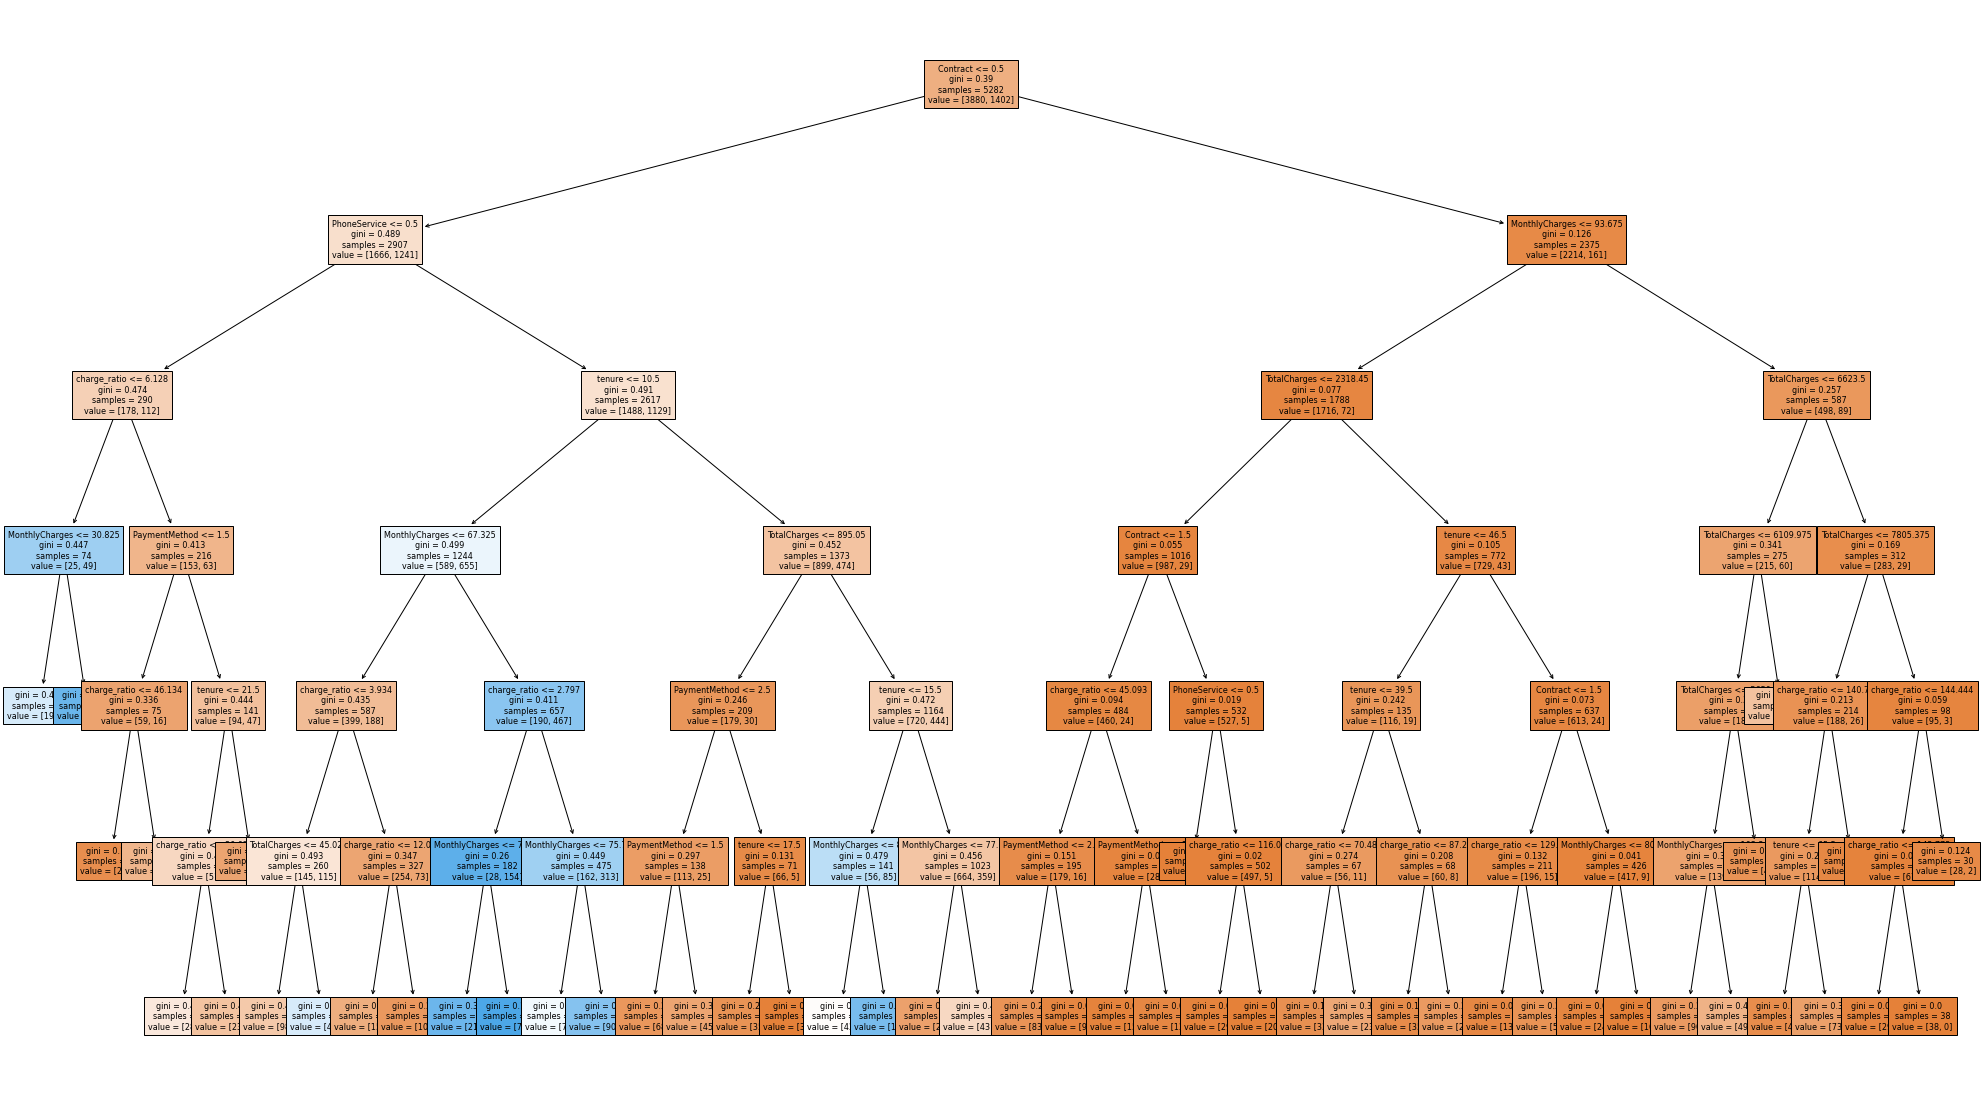

In [35]:
#Plot the decision tree 
f = plt.figure(figsize = (35,20))
_ = plot_tree(dt, fontsize=8, feature_names=x.columns, filled=True)

### 4. Plot the correlations between features and targets

<AxesSubplot:>

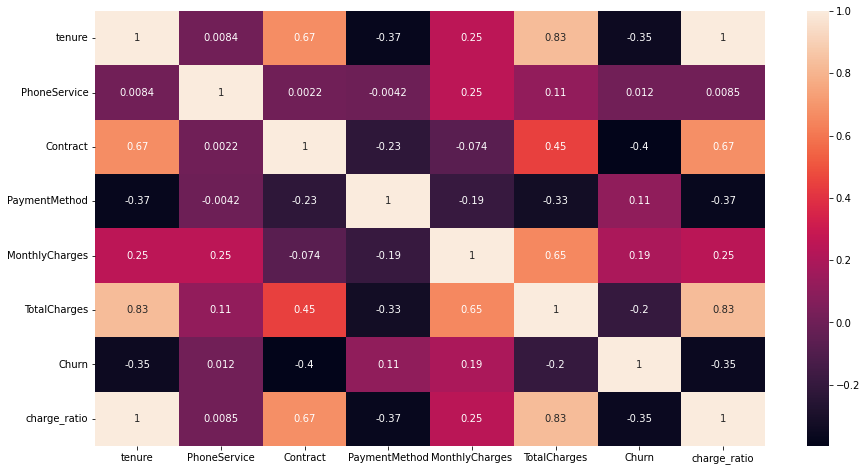

In [36]:
f = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

### 5. Use sklearn to fit a random forest model to predict churn from our dataset

In [37]:
#View model performance without hyperparameters
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.993563044301401
0.778534923339012


In [38]:
#View default max features for dataset
f = math.sqrt(x_train.shape[1])
print(f)

2.6457513110645907


In [39]:
#View model performance with hyperparameters, increase max_features by 1 from what was used in current run
f = math.sqrt(x_train.shape[1])
rfc = RandomForestClassifier(max_depth = 2, max_features = 4, random_state = 42)
rfc.fit(x_train,y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.7870124952669444
0.7762634866553095


##### Plot the feature importances from the random forest

<AxesSubplot:title={'center':'Feature Importance'}>

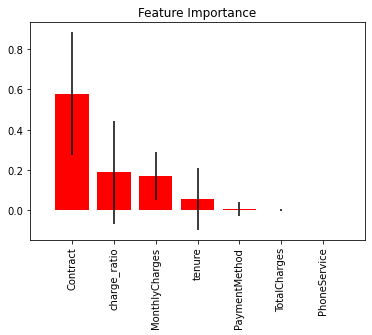

In [40]:
#Plot the feature importances from the random forest
plot_feature_importances(rfc, feature_names=x.columns, x_tick_rotation=90)

#### 4. Choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data

In [41]:
#Drop features of least importance
new_features = x.drop(['PhoneService', 'PaymentMethod'], axis=1)

#Split dataset containing only features identified as important
x_train, x_test, y_train, y_test = train_test_split(new_features,y, stratify=y, random_state=42)

In [42]:
rfc = RandomForestClassifier(max_depth=2, max_features= 4, random_state=42)
rfc.fit(x_train,y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.7872018174933737
0.7773992049971608


##### Examine the feature importances after removing less important features

<AxesSubplot:title={'center':'Feature Importance'}>

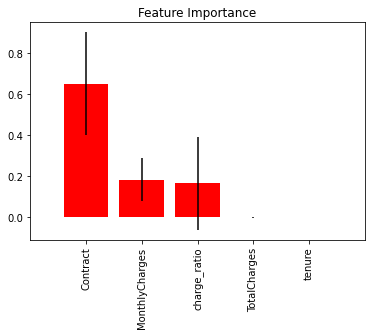

In [43]:
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

# Summary

I started with fitting the data to a decision tree that was not parameterized. The results showed a significant difference in accuracy between the split datasets with the training set to have high overfitting. I performed a grid search to find optimal hyperparameters. The results successfully reduced the gap between the accuracy seen in the last run and reduced the overfitting in the training set. The decision tree plot was too cluttered to determine the bottom leaf values, but this was expected considering its size. The decision tree showed Churn to be the most correlated with PaymentMethod, MonthlyCharges, and PhoneService. However, because these values were still lower than what would be considered a good correlation, they were higher than the other features. 
Accuracy using the Random Forest classifier produced better results than the decision tree when adding hyperparameters. Also, using hyperparameters reduced the difference between both datasets and the overfitting with the training set. Lastly, feature importance was observed in the fitted Random Forest model. It showed PaymentMethod, TotalCharges, and PhoneService to have little importance in model performance. After removing these features and rerunning the model, we saw that feature importance for tenure was low. We are now left with the three features that are the most important for accurately predicting Churn.  
